<a href="https://colab.research.google.com/github/shakeelrifathcse/HerEcho-Safety_system_for_womens/blob/main/Incident_verification(T/F)algorithm/HeartRate_Abnormal_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the Dataset
data = pd.read_csv('/content/drive/MyDrive/HerEcho Datasets/synthetic_heart_rate_dataset.csv')  # Replace 'heartbeat_data.csv' with your actual file path

# Display the first few rows of the dataset
print(data.head())

# Display general info about the dataset
print(data.info())

# Summary statistics
print(data.describe())


   age  heartbeat condition
0   42         72    Normal
1   32         99    Normal
2   18         61    Normal
3   46        143    Normal
4   11        124  Abnormal
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        1000 non-null   int64 
 1   heartbeat  1000 non-null   int64 
 2   condition  1000 non-null   object
dtypes: int64(2), object(1)
memory usage: 23.6+ KB
None
               age    heartbeat
count  1000.000000  1000.000000
mean     26.986000   119.118000
std      13.497852    34.677119
min       4.000000    60.000000
25%      15.000000    89.000000
50%      28.000000   118.000000
75%      38.000000   150.000000
max      50.000000   179.000000


In [108]:
# Check for missing values
print(data.isnull().sum())


age          0
heartbeat    0
condition    0
dtype: int64


In [109]:
# Display data types of columns
print(data.dtypes)


age           int64
heartbeat     int64
condition    object
dtype: object


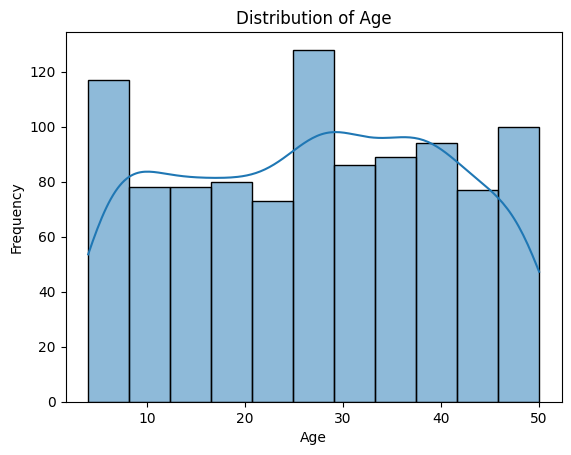

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of Age
sns.histplot(data['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


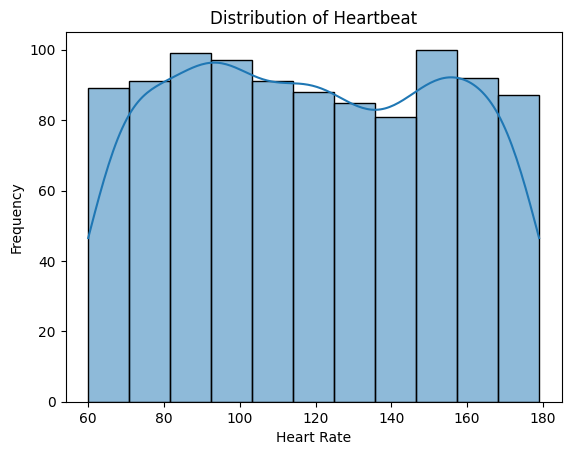

In [111]:
# Plot distribution of Heartbeat
sns.histplot(data['heartbeat'], kde=True)
plt.title('Distribution of Heartbeat')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()


condition
Normal      565
Abnormal    435
Name: count, dtype: int64


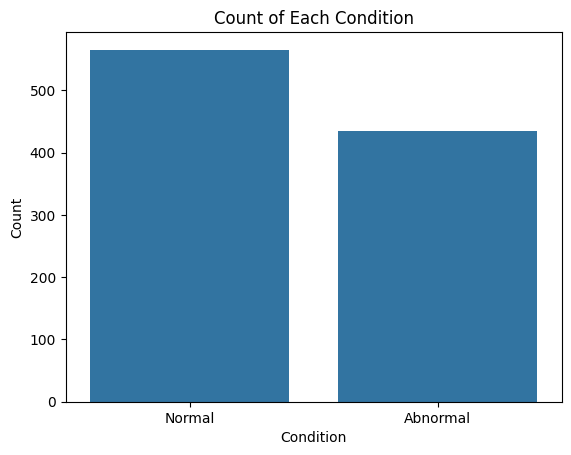

In [112]:
# Count of each condition
print(data['condition'].value_counts())

# Plot the counts
sns.countplot(x='condition', data=data)
plt.title('Count of Each Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()


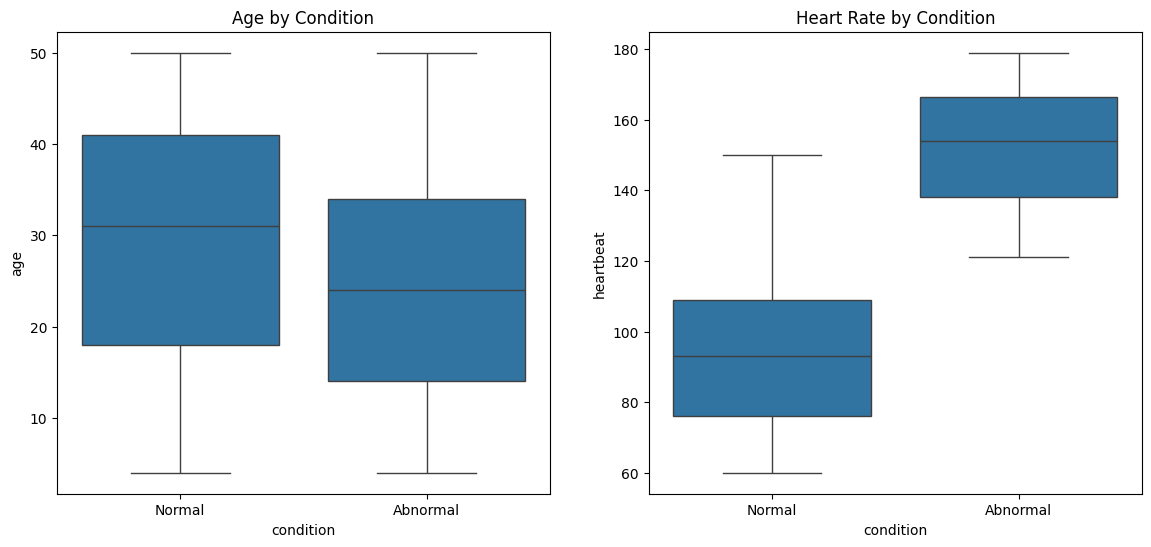

In [113]:
# Age and Heartbeat distributions by Condition
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='condition', y='age', data=data, ax=axes[0])
axes[0].set_title('Age by Condition')

sns.boxplot(x='condition', y='heartbeat', data=data, ax=axes[1])
axes[1].set_title('Heart Rate by Condition')

plt.show()


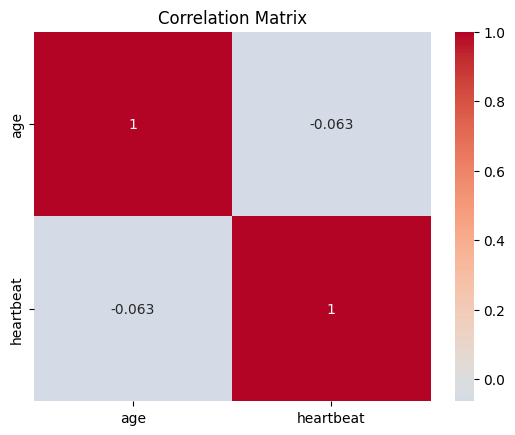

In [114]:
# Compute the correlation matrix
corr = data[['age', 'heartbeat']].corr()

# Plot the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


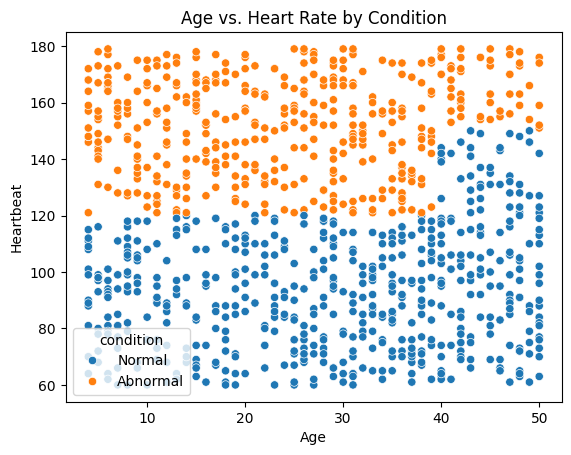

In [115]:
# Scatter plot of Age vs. Heartbeat colored by Condition
sns.scatterplot(x='age', y='heartbeat', hue='condition', data=data)
plt.title('Age vs. Heart Rate by Condition')
plt.xlabel('Age')
plt.ylabel('Heartbeat')
plt.show()


1. Distribution of Age Graph
Purpose: To understand the spread and frequency of ages in your dataset.

Use: Helps identify if there are certain age groups that are more common or if the age distribution is skewed. This can be useful to understand if there is a specific age range that is more prevalent in the data or if the data is balanced across different age groups.

2. Distribution of Heartbeat Graph
Purpose: To visualize the distribution of heartbeat values.
Use: Similar to the age distribution graph, this helps in understanding the spread, central tendency, and variability of heartbeat values. It can reveal if there are common or rare heartbeat values and if there are any outliers.


3. Count of Each Condition Graph
Purpose: To show the frequency of each condition (e.g., presence or absence of a particular health issue).
Use: This graph helps in understanding the balance of classes in your dataset. If one condition is significantly more common than another, it might indicate a class imbalance that needs addressing.

4. Age and Heartbeat by Condition
Purpose: To analyze how age and heartbeat values vary across different conditions.
Use:
Age by Condition: Helps in understanding if age influences the condition or if different age groups are more affected by certain conditions.
Heartbeat by Condition: Shows if there is a significant difference in heartbeat values for different conditions. For instance, if people with a certain condition tend to have higher or lower heart rates compared to others.


5. Correlation Matrix
Purpose: To show the relationship between numerical features.
Use: Helps in identifying the strength and direction of the relationship between features (e.g., age and heartbeat). A high correlation between features might suggest that they are related or that one might influence the other. In this dataset, you might check how strongly age and heartbeat are related.


6. Scatter Plot (Age vs. Heartbeat) Colored by Condition
Purpose: To visualize the relationship between age and heartbeat while distinguishing different conditions.
Use: Helps in understanding if there is a pattern or trend in how age and heartbeat relate to each other across different conditions. For example, you might observe if certain conditions are associated with specific age and heartbeat combinations.

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Load the Dataset
data = pd.read_csv('/content/drive/MyDrive/HerEcho Datasets/synthetic_heart_rate_dataset.csv')  # Replace with your actual file path

# Data Preprocessing
X = data[['age', 'heartbeat']]  # Features: Age and Heartbeat
y = data['condition']           # Labels: Condition (1 for True, 0 for False)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the model for later use
joblib.dump(model, 'logistic_regression_model.pkl')

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.95      0.91      0.93        89
      Normal       0.93      0.96      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Confusion Matrix:
[[ 81   8]
 [  4 107]]


In [117]:
from sklearn.linear_model import LogisticRegression

# Initialize the model with the best parameters
best_model = LogisticRegression(C=0.01, solver='lbfgs')

# Train the model
best_model.fit(X_train, y_train)


LogisticRegression(C=0.01)

In [118]:
# Check the distribution of the target variable
print(data['condition'].value_counts())


condition
Normal      565
Abnormal    435
Name: count, dtype: int64


In [119]:
# Inspect the first few rows of the training set
print(X_train.head())
print(y_train.head())


     age  heartbeat
29    30         93
535   24         84
695   31        121
557   33        114
836   32        139
29       Normal
535      Normal
695    Abnormal
557      Normal
836    Abnormal
Name: condition, dtype: object


In [120]:
# Get model coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [[ 0.11967102 -0.19628829]]
Intercept: [21.60979447]


In [121]:
# Convert condition labels to numeric values
data['condition'] = data['condition'].map({'Normal': 0, 'Abnormal': 1})

# Re-split the dataset into features and labels
X = data[['age', 'heartbeat']]  # Features
y = data['condition']           # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [128]:
def predict_condition(age, heartbeat):
    """
    Predict the condition based on age and heartbeat.

    Parameters:
    - age (int): The age of the individual
    - heartbeat (int): The heartbeat rate

    Returns:
    - condition (str): Predicted condition ("Normal" or "Abnormal")
    """
    # Prepare the data for prediction as a DataFrame with the correct column names
    input_data = pd.DataFrame([[age, heartbeat]], columns=['age', 'heartbeat'])

    # Predict using the trained model
    prediction = model.predict(input_data)
    prediction_prob = model.predict_proba(input_data)

    # Map numeric prediction back to condition
    condition = "Normal" if prediction[0] == 0 else "Abnormal"

    return condition

# Test with an example
age = int(input("Enter the age: "))
heartbeat = int(input("Enter the heartbeat (bpm): "))
condition = predict_condition(age, heartbeat)
print(f"The condition for Age={age} and Heartbeat={heartbeat} is: {condition}")


Enter the age: 25
Enter the heartbeat (bpm): 130
The condition for Age=25 and Heartbeat=130 is: Abnormal


In [123]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Detailed report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       111
           1       0.95      0.91      0.93        89

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Confusion Matrix:
[[107   4]
 [  8  81]]


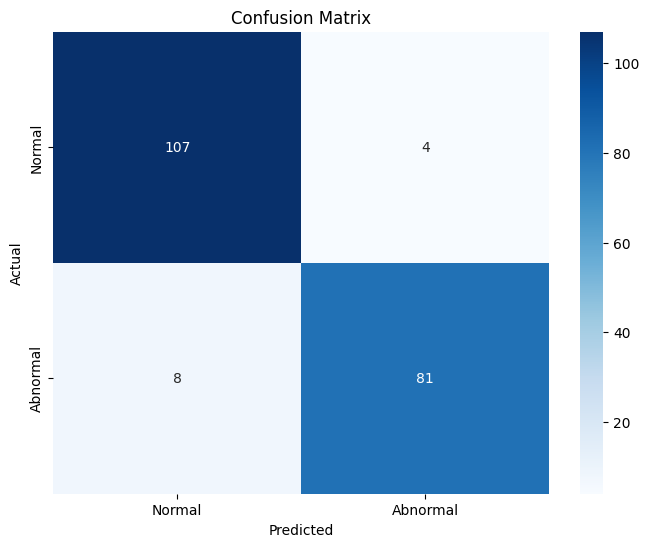

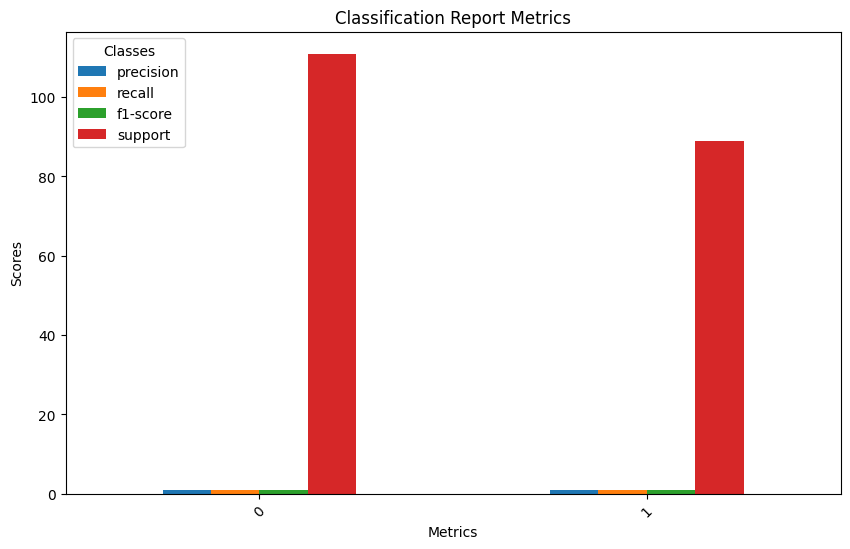

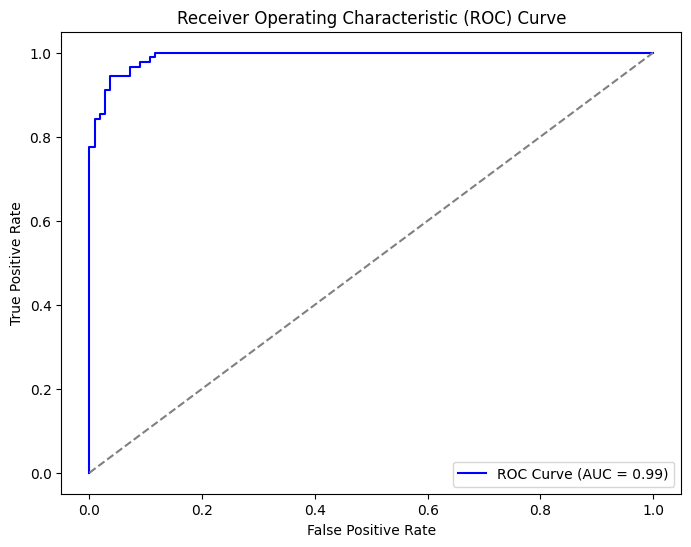

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Confusion Matrix Heatmap
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Normal', 'Abnormal']
plot_confusion_matrix(cm, labels)

# 2. Classification Report Metrics Visualization
from sklearn.metrics import classification_report
import pandas as pd

def plot_classification_report(cr):
    report_data = []
    for key in cr.keys():
        if key not in ['accuracy', 'macro avg', 'weighted avg']:
            report_data.append(cr[key])

    df = pd.DataFrame(report_data, index=[k for k in cr.keys() if k not in ['accuracy', 'macro avg', 'weighted avg']])
    df.plot(kind='bar', figsize=(10, 6))
    plt.title('Classification Report Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.xticks(rotation=45)
    plt.legend(title='Classes')
    plt.show()

# Print and plot the classification report
report = classification_report(y_test, y_pred, output_dict=True)
plot_classification_report(report)

# 3. ROC Curve
def plot_roc_curve(fpr, tpr, auc_score):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Compute ROC curve and ROC AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plot_roc_curve(fpr, tpr, auc_score)
